# Caderno 3 - Calcula métricas atuais

## 1. Carrega as bases de dados

É necessário buscar o qrels (parâmetro de comparação), saída do caderno 1, e o resultado da busca feita na pesquisa atual, saída do caderno 2.

O resultado da busca foi feito usando 3 handlers (select, selectSwan e selectSwanSynonym). Por isso, após carregar os dados, é necessário separar os conjuntos de resultados. Na prática, usaremos apenas o selectSwanSynonym (padrão).

In [1]:
import pandas as pd

PASTA_DADOS = './dados/'
PASTA_JURIS_TCU = f'{PASTA_DADOS}outputs/1_tratamento_juris_tcu/'
PASTA_RESULTADO_PESQUISA_SOLR = f'{PASTA_DADOS}outputs/2_pesquisa_queries_na_base_atual/'

qrels = pd.read_csv(f'{PASTA_JURIS_TCU}qrel_tratado.csv', sep='|')
resultado_pesq_solr = pd.read_csv(f'{PASTA_RESULTADO_PESQUISA_SOLR}resultado_solr_pesquisa_original.csv', sep='|')

resultado_select = resultado_pesq_solr[resultado_pesq_solr.ENGINE == 'SOLR_PESQUISA_ORIGINAL_select']
resultado_select_swan = resultado_pesq_solr[resultado_pesq_solr.ENGINE == 'SOLR_PESQUISA_ORIGINAL_selectSwan']
resultado_select_swan_synonym = resultado_pesq_solr[resultado_pesq_solr.ENGINE == 'SOLR_PESQUISA_ORIGINAL_selectSwanSynonym']

## 2. Calcula as métricas

In [2]:
from metricas import metricas

metricas_select = metricas(resultado_select, qrels, aproximacao_trec_eval=True)
metricas_select_swan = metricas(resultado_select_swan, qrels, aproximacao_trec_eval=True)
metricas_select_swan_synonym = metricas(resultado_select_swan_synonym, qrels, aproximacao_trec_eval=True)

### 2.1 Resultado tabular

Os testes envolvem 3 grupos de query. Vamos separar cada grupo e ver as métricas de cada um deles.

In [3]:
# Grupo 1 - queries de 0:50

display(metricas_select[0:50].describe())
display(metricas_select_swan[0:50].describe())
display(metricas_select_swan_synonym[0:50].describe())

,QUERY_KEY,P@5,P@10,P@50,R@5,R@10,R@50,MRR@5,MRR@10,MRR@50,nDCG@5,nDCG@10,nDCG@50
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,0.228000,0.224000,0.121200,0.090891,0.181985,0.496675,0.325333,0.351127,0.363872,0.208798,0.224034,0.383950
std,14.57738,0.302399,0.235225,0.065827,0.117575,0.185708,0.294862,0.405325,0.387716,0.376717,0.297882,0.254877,0.237044
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.25000,0.000000,0.000000,0.080000,0.000000,0.000000,0.283333,0.000000,0.000000,0.080420,0.000000,0.000000,0.218542
50%,25.50000,0.200000,0.200000,0.120000,0.069048,0.133333,0.461538,0.200000,0.200000,0.200000,0.105037,0.145312,0.367784
75%,37.75000,0.350000,0.400000,0.180000,0.122727,0.302198,0.750000,0.500000,0.500000,0.500000,0.286279,0.307199,0.520930
max,50.00000,1.000000,0.900000,0.220000,0.384615,0.642857,1.000000,1.000000,1.000000,1.000000,1.000000,0.916947,0.906863


,QUERY_KEY,P@5,P@10,P@50,R@5,R@10,R@50,MRR@5,MRR@10,MRR@50,nDCG@5,nDCG@10,nDCG@50
count,50.00000,50.000000,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,0.268000,0.24200,0.12680,0.106900,0.196755,0.516385,0.360333,0.384833,0.394399,0.246993,0.248089,0.410573
std,14.57738,0.309338,0.23043,0.06371,0.121413,0.180524,0.283683,0.408150,0.389234,0.380109,0.307498,0.255327,0.236926
min,1.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.25000,0.000000,0.10000,0.08500,0.000000,0.071429,0.333333,0.000000,0.111111,0.111111,0.000000,0.066308,0.222201
50%,25.50000,0.200000,0.20000,0.12000,0.076923,0.133333,0.516667,0.250000,0.250000,0.250000,0.136931,0.191503,0.417320
75%,37.75000,0.400000,0.40000,0.18000,0.163462,0.333333,0.750000,0.875000,0.875000,0.875000,0.343923,0.395448,0.534497
max,50.00000,1.000000,0.90000,0.22000,0.384615,0.642857,1.000000,1.000000,1.000000,1.000000,1.000000,0.924492,0.913836


,QUERY_KEY,P@5,P@10,P@50,R@5,R@10,R@50,MRR@5,MRR@10,MRR@50,nDCG@5,nDCG@10,nDCG@50
count,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,0.288000,0.26000,0.131600,0.115506,0.212030,0.534756,0.372000,0.396278,0.405359,0.265298,0.265604,0.429272
std,14.57738,0.318568,0.23819,0.061024,0.126254,0.188635,0.271167,0.404922,0.385263,0.376281,0.314492,0.262778,0.232726
min,1.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.25000,0.000000,0.10000,0.100000,0.000000,0.071429,0.357143,0.000000,0.111111,0.111111,0.000000,0.066774,0.249368
50%,25.50000,0.200000,0.20000,0.130000,0.076923,0.154762,0.535897,0.250000,0.250000,0.250000,0.144363,0.205395,0.439704
75%,37.75000,0.550000,0.40000,0.180000,0.200000,0.333333,0.750000,0.875000,0.875000,0.875000,0.483331,0.441226,0.555777
max,50.00000,1.000000,0.90000,0.220000,0.384615,0.642857,1.000000,1.000000,1.000000,1.000000,1.000000,0.924492,0.913836


In [4]:
# Grupo 2 - queries de 50:100

display(metricas_select[50:100].describe())
display(metricas_select_swan[50:100].describe())
display(metricas_select_swan_synonym[50:100].describe())

,QUERY_KEY,P@5,P@10,P@50,R@5,R@10,R@50,MRR@5,MRR@10,MRR@50,nDCG@5,nDCG@10,nDCG@50
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,0.400000,0.248000,0.060400,0.166995,0.206648,0.253084,0.789000,0.794833,0.794833,0.505348,0.408960,0.413254
std,14.57738,0.291373,0.214989,0.057355,0.124864,0.184427,0.250287,0.377328,0.365834,0.365834,0.279986,0.221882,0.217412
min,51.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.25000,0.200000,0.100000,0.020000,0.083333,0.083333,0.083333,0.625000,0.625000,0.625000,0.386506,0.300995,0.298268
50%,75.50000,0.400000,0.200000,0.040000,0.153846,0.153846,0.153846,1.000000,1.000000,1.000000,0.511553,0.406366,0.402028
75%,87.75000,0.600000,0.300000,0.080000,0.230769,0.282468,0.326923,1.000000,1.000000,1.000000,0.695703,0.537971,0.538400
max,100.00000,1.000000,0.900000,0.200000,0.500000,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909499,0.890452


,QUERY_KEY,P@5,P@10,P@50,R@5,R@10,R@50,MRR@5,MRR@10,MRR@50,nDCG@5,nDCG@10,nDCG@50
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,0.452000,0.282000,0.064400,0.187739,0.234802,0.268955,0.868333,0.868333,0.868333,0.561530,0.454476,0.448740
std,14.57738,0.273481,0.222866,0.056754,0.118027,0.193685,0.248227,0.279744,0.279744,0.279744,0.233417,0.198010,0.201147
min,51.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.25000,0.200000,0.100000,0.020000,0.085227,0.085227,0.090909,1.000000,1.000000,1.000000,0.434977,0.327267,0.312689
50%,75.50000,0.400000,0.200000,0.040000,0.153846,0.160256,0.160256,1.000000,1.000000,1.000000,0.553146,0.428343,0.408530
75%,87.75000,0.600000,0.400000,0.080000,0.250000,0.326923,0.371795,1.000000,1.000000,1.000000,0.716849,0.562858,0.580168
max,100.00000,1.000000,0.900000,0.200000,0.500000,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909499,0.890452


,QUERY_KEY,P@5,P@10,P@50,R@5,R@10,R@50,MRR@5,MRR@10,MRR@50,nDCG@5,nDCG@10,nDCG@50
count,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,0.456000,0.28800,0.064800,0.189168,0.239564,0.270384,0.866667,0.866667,0.866667,0.563932,0.457885,0.450296
std,14.57738,0.280058,0.22825,0.056649,0.119936,0.197816,0.247692,0.283223,0.283223,0.283223,0.239588,0.199206,0.200707
min,51.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.25000,0.200000,0.10000,0.020000,0.083333,0.085227,0.090909,1.000000,1.000000,1.000000,0.434977,0.327267,0.312689
50%,75.50000,0.400000,0.20000,0.040000,0.160256,0.166667,0.166667,1.000000,1.000000,1.000000,0.553146,0.428343,0.413326
75%,87.75000,0.600000,0.40000,0.080000,0.267045,0.326923,0.371795,1.000000,1.000000,1.000000,0.716849,0.565102,0.578978
max,100.00000,1.000000,0.90000,0.200000,0.500000,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909499,0.890452


In [5]:
# Grupo 3 - queries de 100:150

display(metricas_select[100:150].describe())
display(metricas_select_swan[100:150].describe())
display(metricas_select_swan_synonym[100:150].describe())

,QUERY_KEY,P@5,P@10,P@50,R@5,R@10,R@50,MRR@5,MRR@10,MRR@50,nDCG@5,nDCG@10,nDCG@50
count,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,125.50000,0.00800,0.004000,0.001200,0.003636,0.003636,0.005303,0.040000,0.040000,0.041000,0.014257,0.010047,0.011072
std,14.57738,0.03959,0.019795,0.004798,0.017995,0.017995,0.021222,0.197949,0.197949,0.197869,0.070641,0.050117,0.049487
min,101.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113.25000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,125.50000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,137.75000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,150.00000,0.20000,0.100000,0.020000,0.090909,0.090909,0.090909,1.000000,1.000000,1.000000,0.373699,0.282274,0.275055


,QUERY_KEY,P@5,P@10,P@50,R@5,R@10,R@50,MRR@5,MRR@10,MRR@50,nDCG@5,nDCG@10,nDCG@50
count,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,125.50000,0.036000,0.01800,0.003600,0.016394,0.016394,0.016394,0.110000,0.110000,0.110000,0.050977,0.037232,0.036414
std,14.57738,0.125779,0.06289,0.012578,0.057238,0.057238,0.057238,0.307889,0.307889,0.307889,0.157140,0.114432,0.111993
min,101.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113.25000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,125.50000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,137.75000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,150.00000,0.800000,0.40000,0.080000,0.363636,0.363636,0.363636,1.000000,1.000000,1.000000,0.868795,0.617230,0.603705


,QUERY_KEY,P@5,P@10,P@50,R@5,R@10,R@50,MRR@5,MRR@10,MRR@50,nDCG@5,nDCG@10,nDCG@50
count,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,125.50000,0.036000,0.01800,0.003600,0.016394,0.016394,0.016394,0.110000,0.110000,0.110000,0.050977,0.037232,0.036414
std,14.57738,0.125779,0.06289,0.012578,0.057238,0.057238,0.057238,0.307889,0.307889,0.307889,0.157140,0.114432,0.111993
min,101.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113.25000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,125.50000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,137.75000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,150.00000,0.800000,0.40000,0.080000,0.363636,0.363636,0.363636,1.000000,1.000000,1.000000,0.868795,0.617230,0.603705


### 2.2 Resultado gráfico

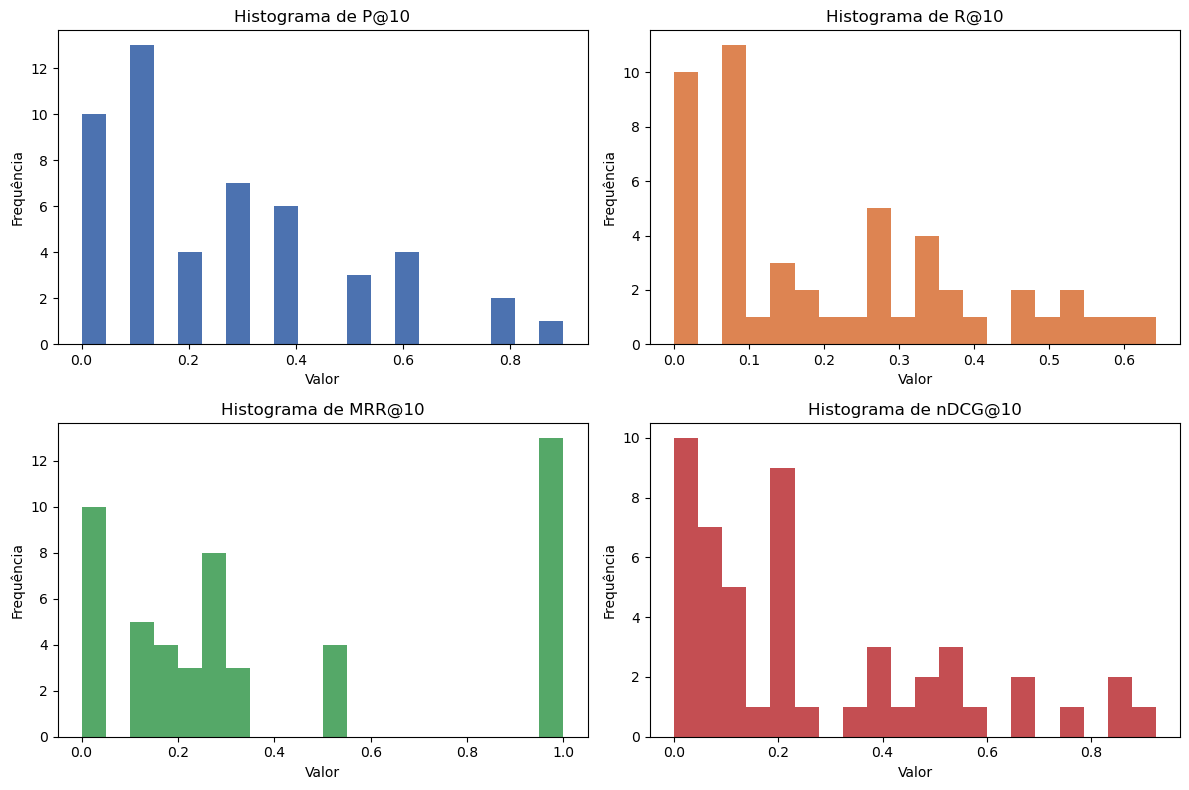

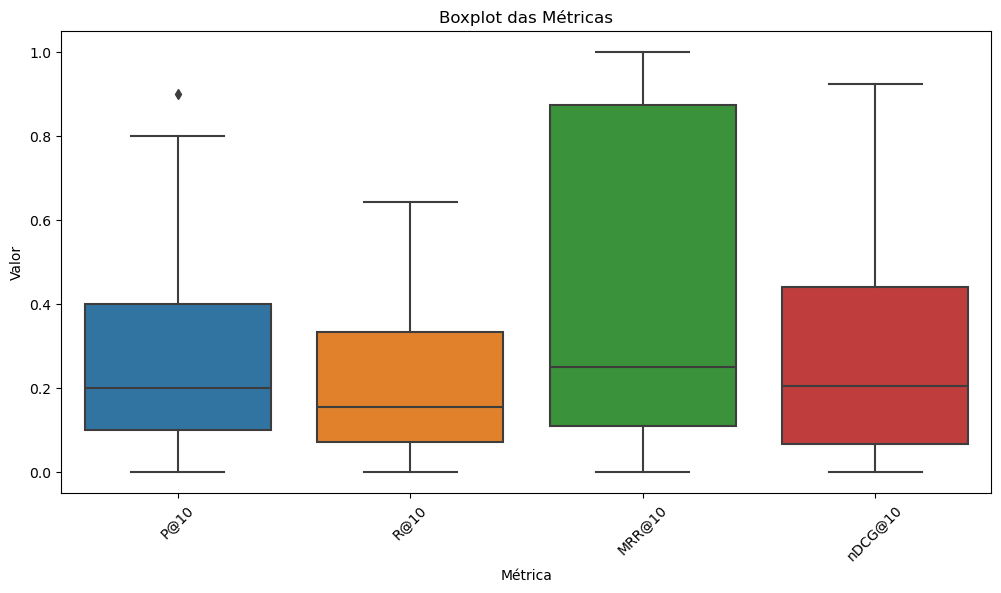

In [6]:
from metricas import histograma_metricas, boxplot_metricas
# Resultados para o primeiro grupo de queries:

histograma_metricas(metricas_select_swan_synonym[0:50])
boxplot_metricas(metricas_select_swan_synonym[0:50])

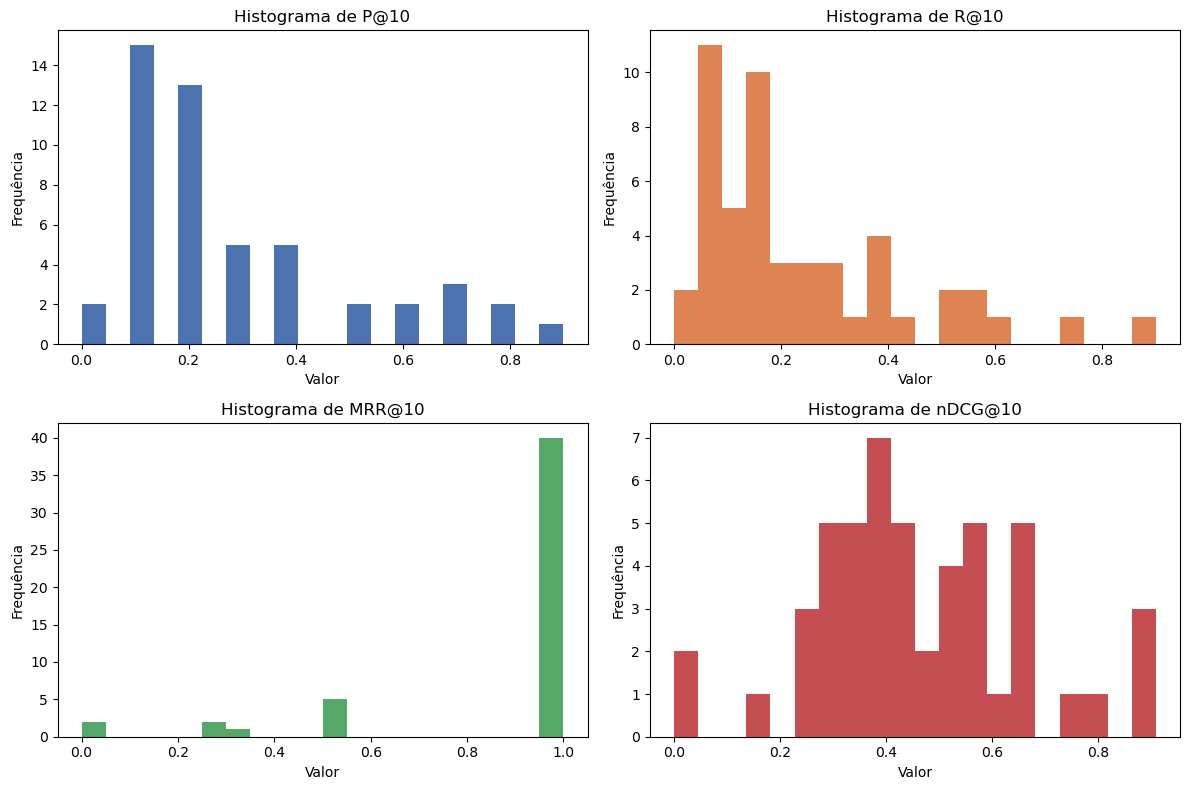

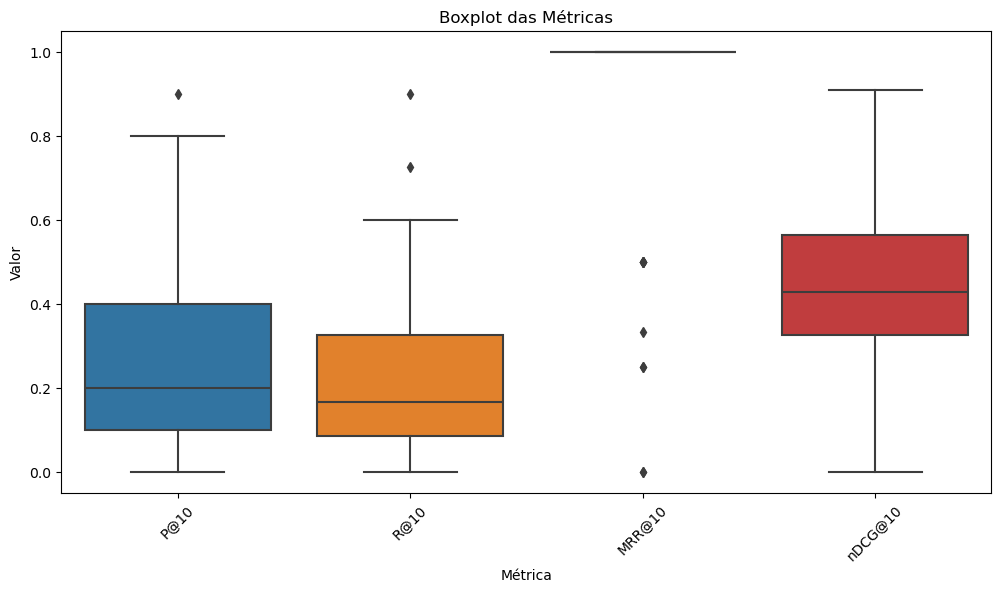

In [7]:
# Resultados para o segundo grupo de queries:

histograma_metricas(metricas_select_swan_synonym[50:100])
boxplot_metricas(metricas_select_swan_synonym[50:100])

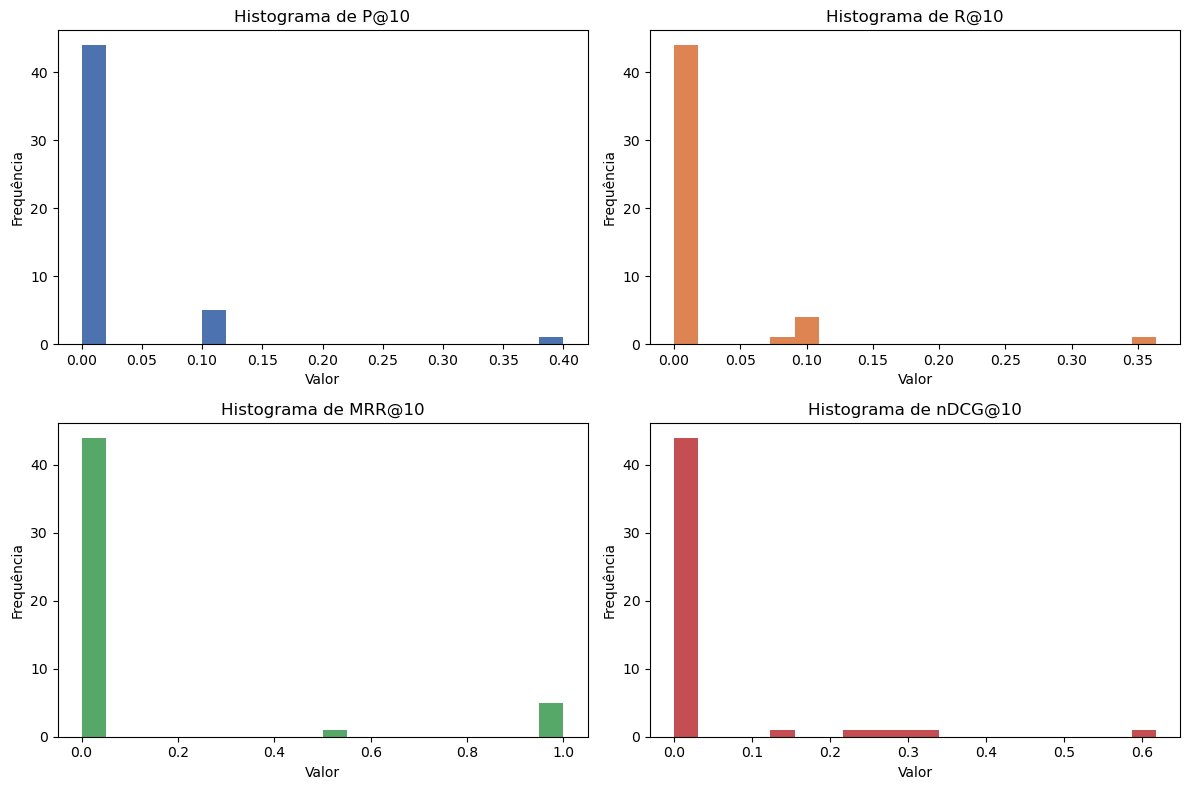

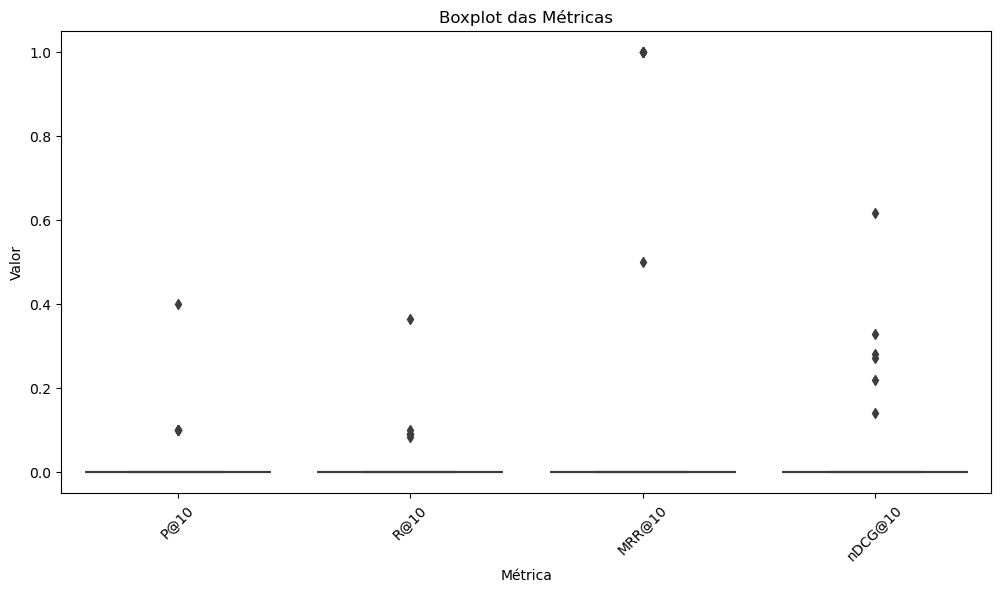

In [8]:
# Resultados para o terceiro grupo de queries:

histograma_metricas(metricas_select_swan_synonym[100:150])
boxplot_metricas(metricas_select_swan_synonym[100:150])